In [21]:
import matplotlib.pyplot as plt
import numpy as np

- M represents the number of devices contending for random access in the channel.
- N represents the total number of available RAOs in the random access channel.


In [22]:

M = 10
NS1 =[]
poisson = np.random.default_rng().poisson(5,100)
print(poisson)



[ 3  4  6  8  1  3  6  5  3  9  6  6  7  7  1  5  6  5  8  2  4 10  5  3
  5  3  6  2  9  4  1  4  3  5  6  3  3  5  6  4  5  6  8  3  4  6  6  3
  2  5  6  5  7  4  6  4  6  1  5  8  2  4  4  4  4  4  6  6  7  6  2  7
  4 10  5  6  3  2  1  5  6  8  8  4  2  8 10  2  5  4  2  6  3  5  5  5
  3  5  3  5]


In [39]:
def NSi(k, n, i):
    return k[i]*np.exp(-k[i]/n[i])

def NCi(k, n, i):
    return n[i] - k[i]*exp(-k[i]/n[i]) - n[i]*exp(-k[i]/n[i])

### RAO Equation

3


ValueError: x and y must have same first dimension, but have shapes (1000,) and (1,)

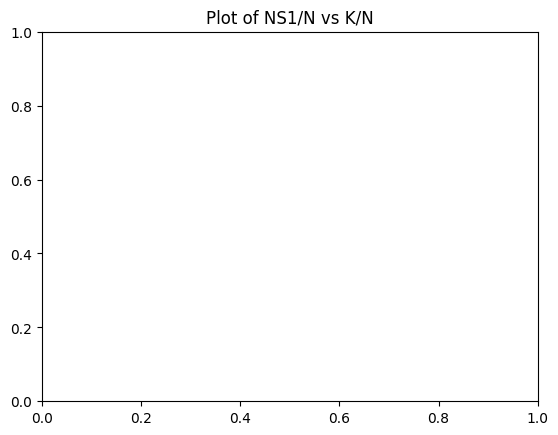

In [44]:

# NCi= N - K*np.exp(-K/N) - N1*np.exp(-K/N)

plt.title('Plot of NS1/N vs K/N')
K = np.linspace(0, 10, 1000)
for N in [[3]]:
    NS1 = NSi(K, N, 0)  # Compute NS1 inside the loop
    plt.plot(K/N[0], NS1/N[0], label=f'Equation 4')
    
# Adding labels and title
plt.xlabel('K/N')
plt.ylabel('RAO/N')

# Show legend
plt.legend()

# Display the plot
plt.show()